## Test of inverted double pendulum control with mppi


In [1]:
import torch
import numpy as np
import pybullet as p
import pybullet_data as pd
from base_env import BaseEnv
import gym
from mppi import MPPI
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from IPython import display
from tqdm.notebook import tqdm
from celluloid import Camera
import os
import imageio

pybullet build time: May 20 2022 19:44:17


In [2]:
%load_ext autoreload
%autoreload 2

In [57]:
from double_pendulum_system import *
controller = DoublePendulumControl(dynamics=dynamics_analytic,cost_function=cost_function)
initial_state = torch.from_numpy(np.random.randn(6))
initial_state = torch.tensor([0,0,np.pi,0,np.pi,0])
state = initial_state
target = torch.tensor([0,0,0,0,0,0])
num_steps = 100
pbar = tqdm(range(num_steps))

if not os.path.exists('plots'):
    os.makedirs('plots')

for i in pbar:
    
    action = controller.control_calcu(state)
    # print(action)
    
    # action -= K*state[0]

    state = dynamics_analytic(state,action)
    state = state.squeeze()
    # print(state)
    error_i = np.linalg.norm(state[1:]-target[1:])
    pbar.set_description(f'Goal Error: {error_i:.4f}')

    # --- Start plotting
    fig, ax = plt.subplots()
    ax = plt.axes(xlim=(state[0]-10, state[0]+10), ylim=(-2, 2))
    ax.set_aspect('equal')
    ax.grid()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Double Pendulum at t={:.2f}'.format(i*0.05))
    x = state[0]
    theta1 = state[2]
    theta2 = state[4]
    L1 = 0.5
    L2 = 0.5
    x1 = x + L1*torch.sin(theta1)
    y1 = L1*torch.cos(theta1)
    x2 = x1 + L2*torch.sin(theta2)
    y2 = y1 + L2*torch.cos(theta2)
    plt.plot([x,x1],[0,y1],color='black')   
    plt.plot([x1,x2],[y1,y2],color='black')
    filename = os.path.join('plots', 'plot_{:03d}.png'.format(i))
    plt.savefig(filename)
    plt.close()
    if error_i < 0.1:
        break
    # --- End plotting

images = []
for i in range(num_steps):
    filename = os.path.join('plots', 'plot_{:03d}.png'.format(i))
    images.append(imageio.imread(filename))
imageio.mimsave('double_pendulum.gif', images, duration=0.1)



  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_1088/1575983845.py:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [32]:
a= torch.tensor([1,2,3])
b = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(a.shape)
print(b.shape)
c = torch.matmul(a,b)

torch.Size([3])
torch.Size([4, 3])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x3 and 4x3)

/tmp/ipykernel_3169/1159072354.py:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))
/tmp/ipykernel_3169/1159072354.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


OSError: Cannot understand given URI: [Array([[[255, 255, 255, 255],
        [255, 255, 255, 25....

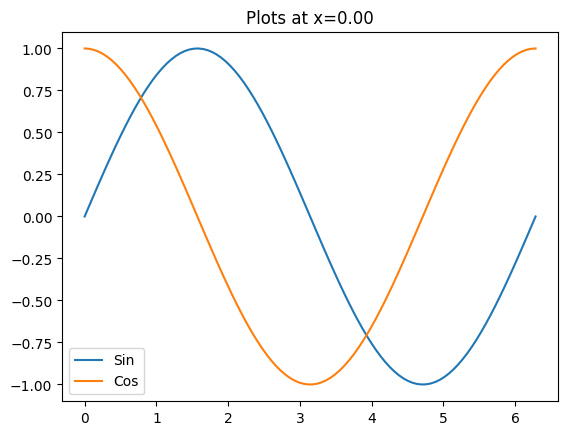

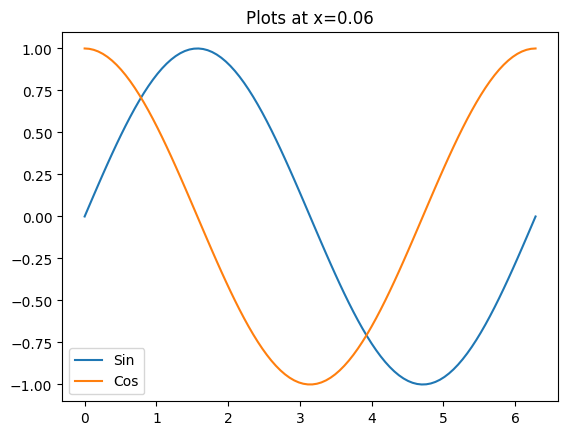

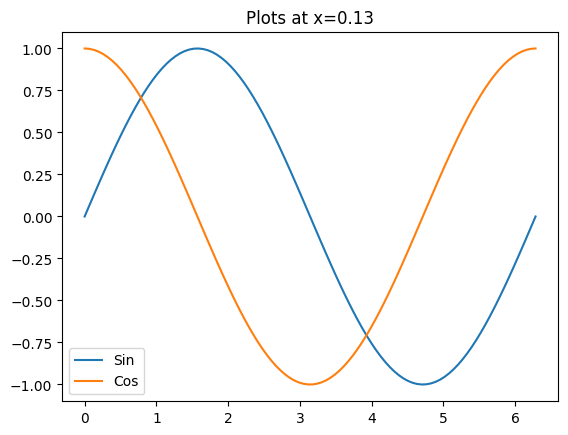

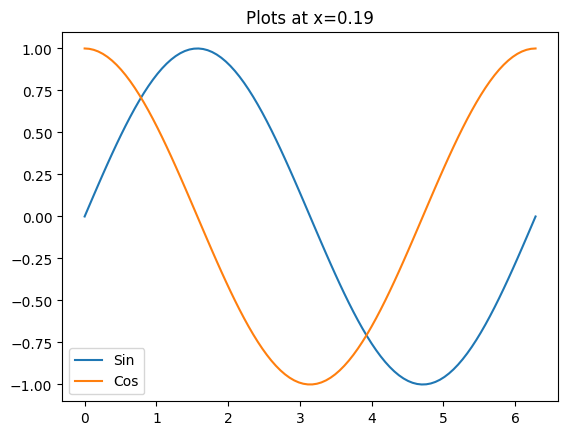

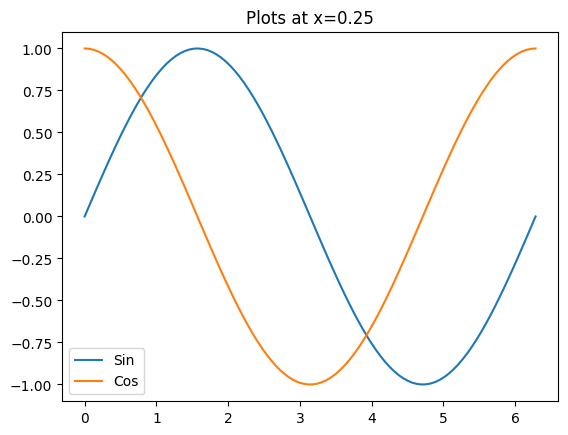

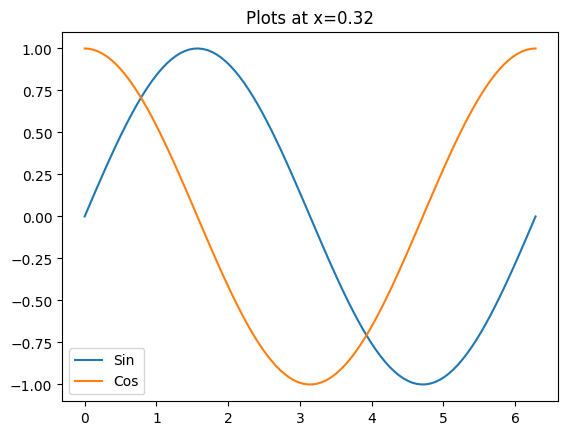

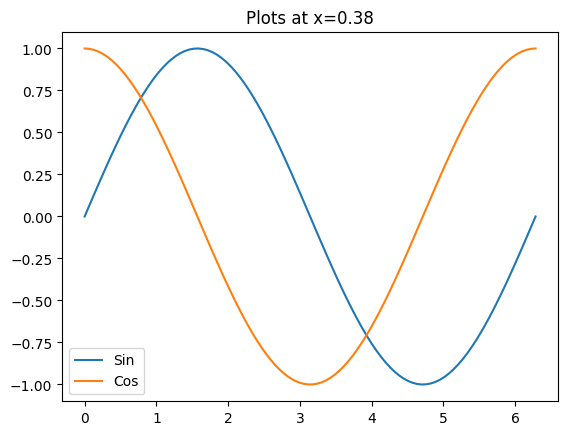

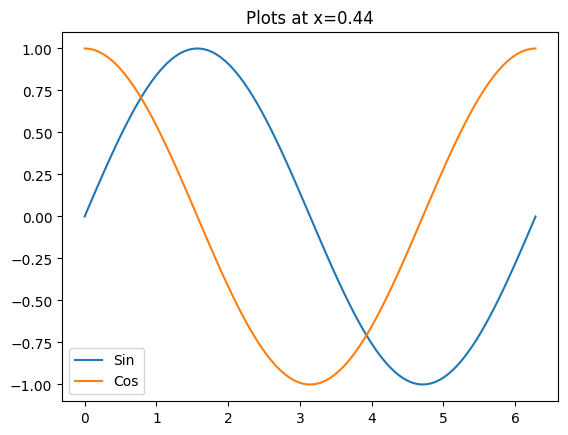

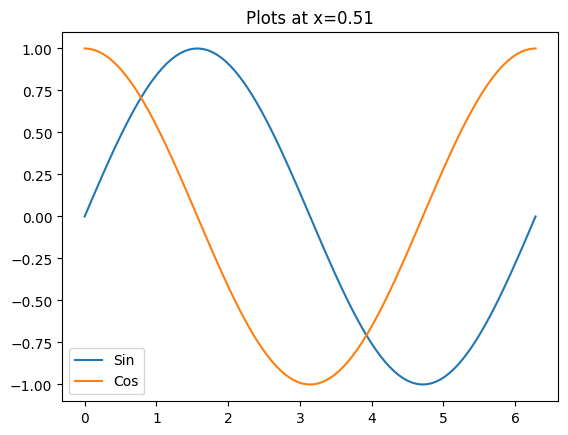

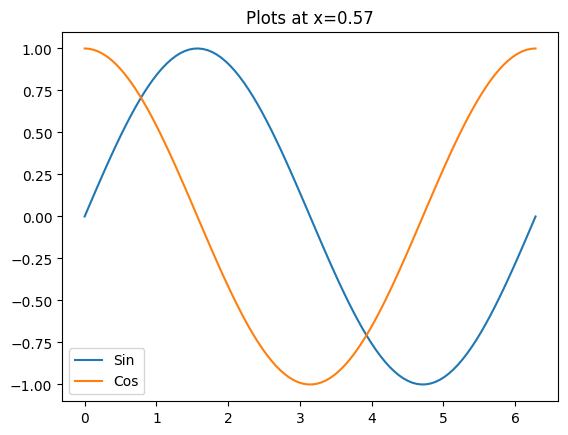

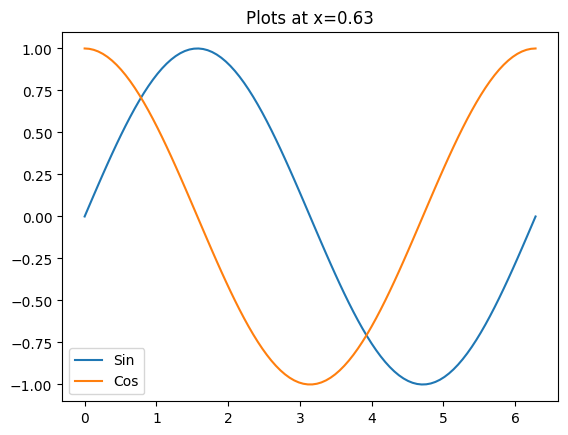

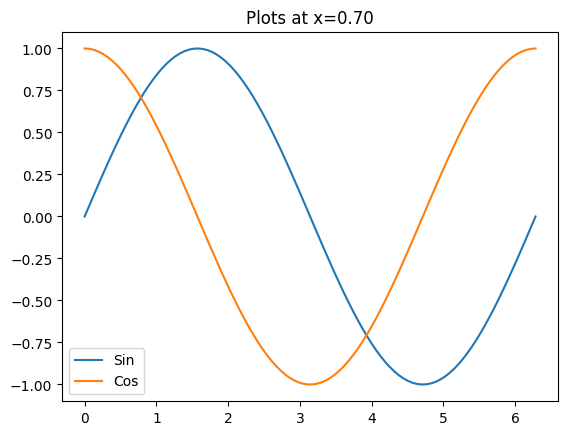

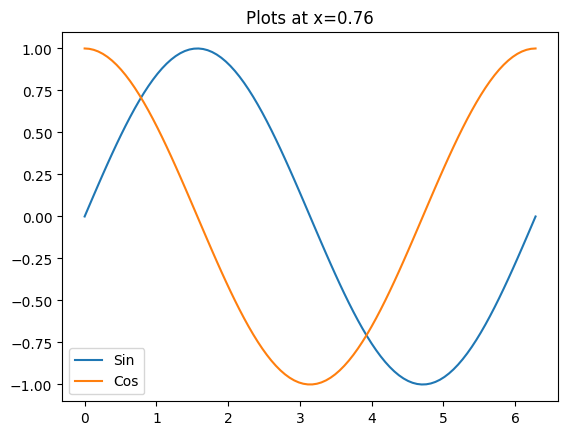

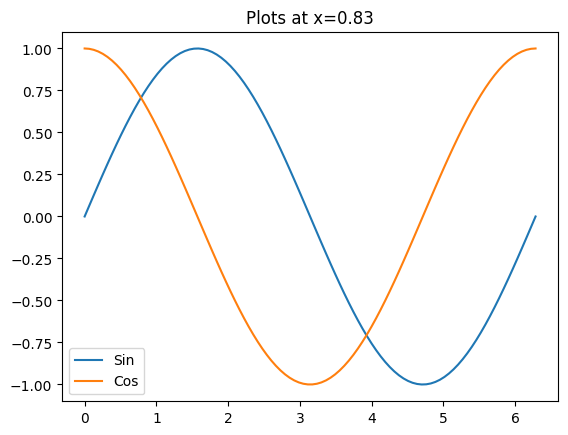

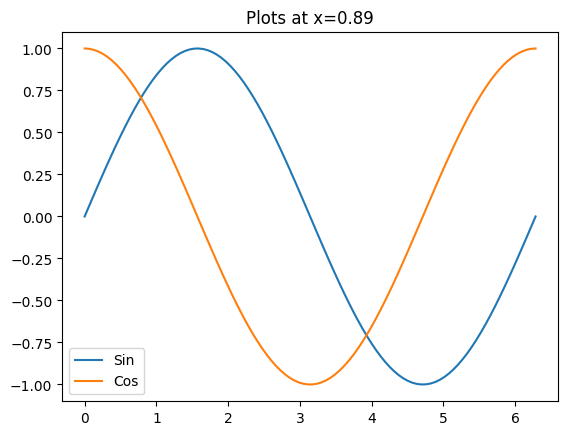

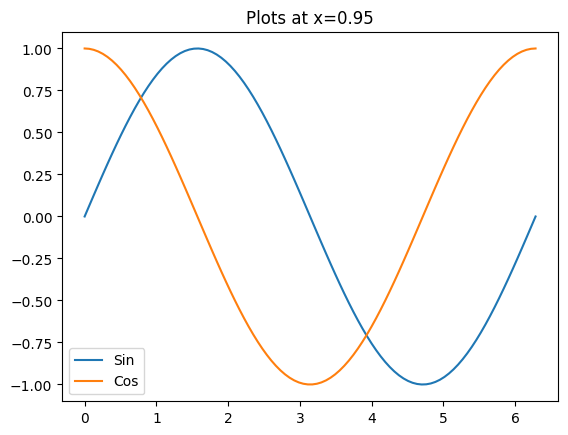

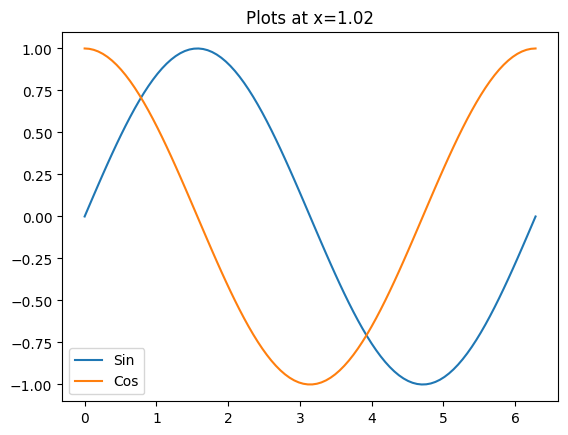

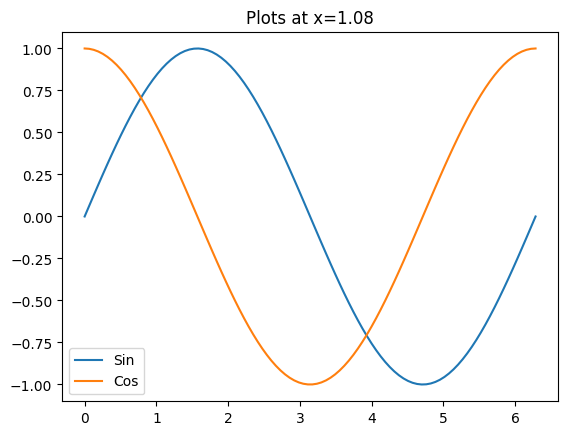

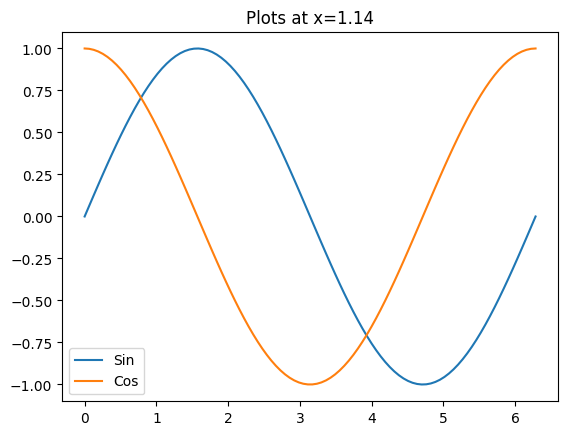

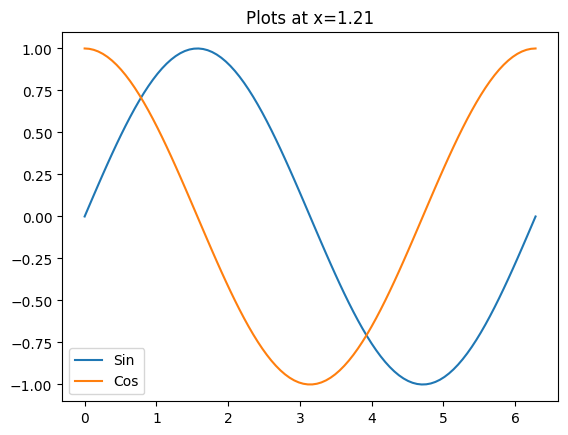

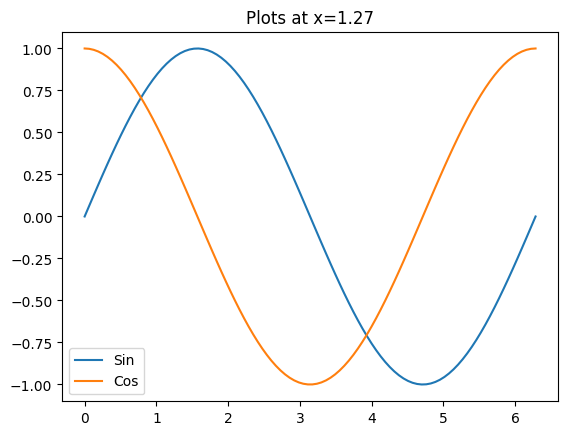

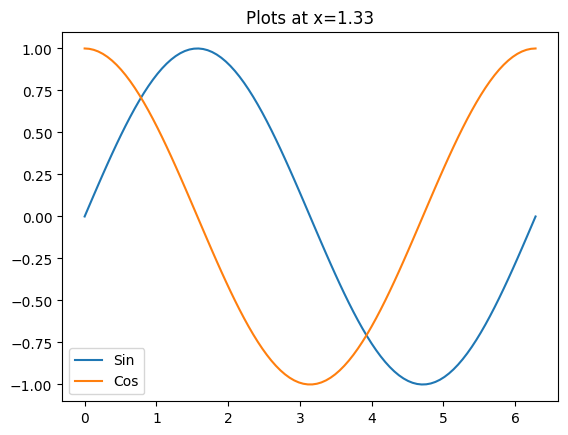

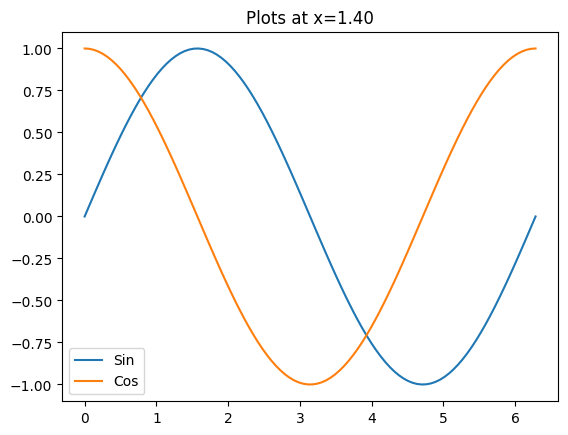

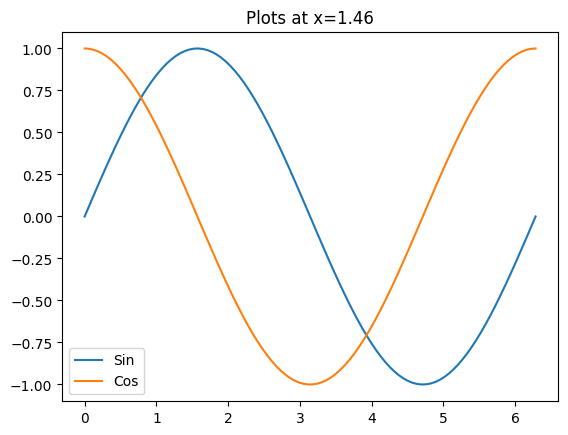

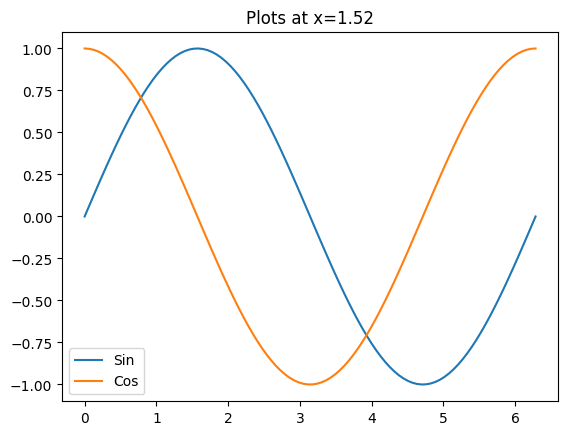

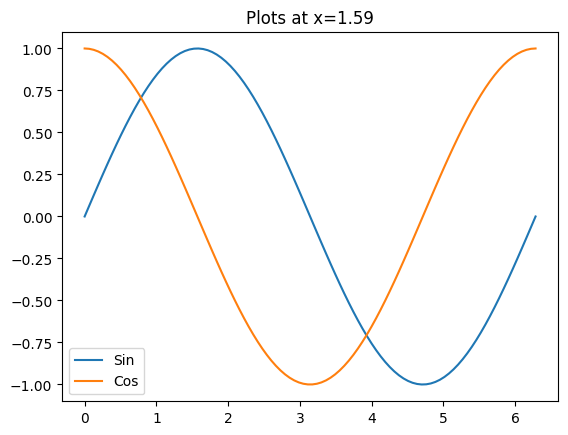

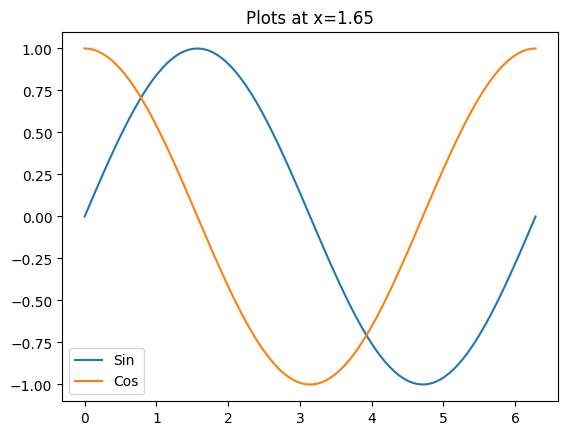

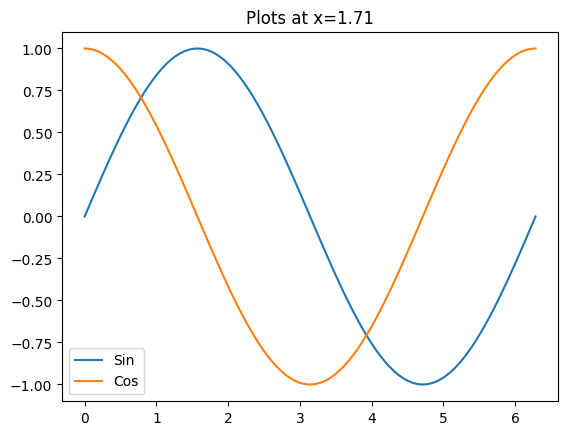

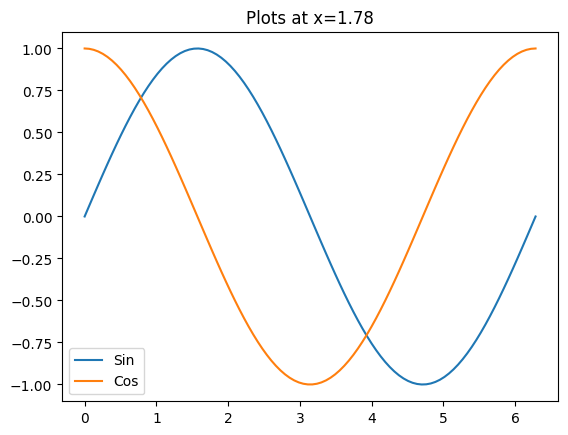

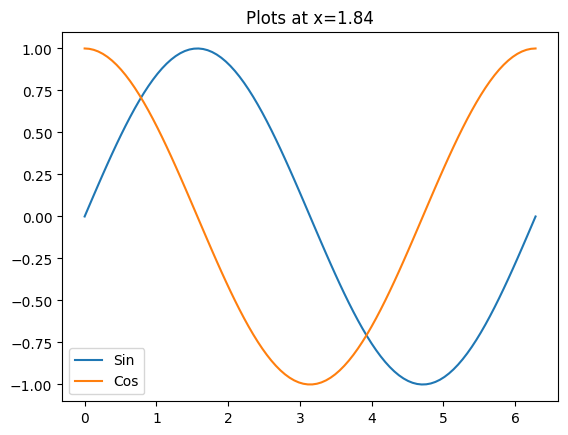

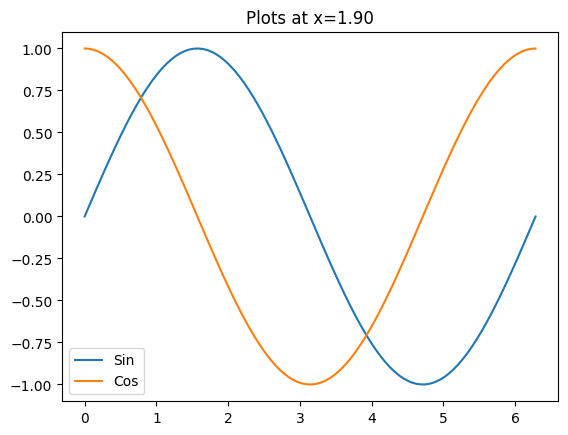

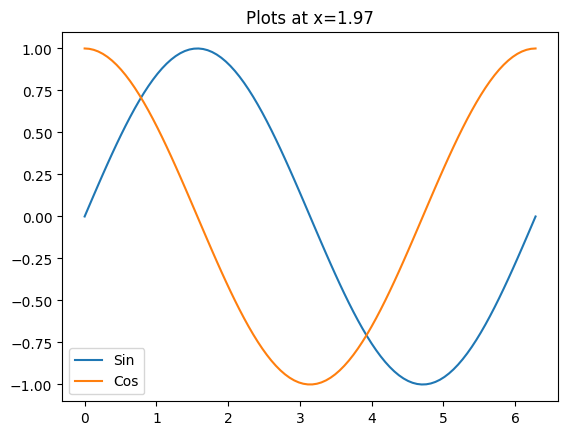

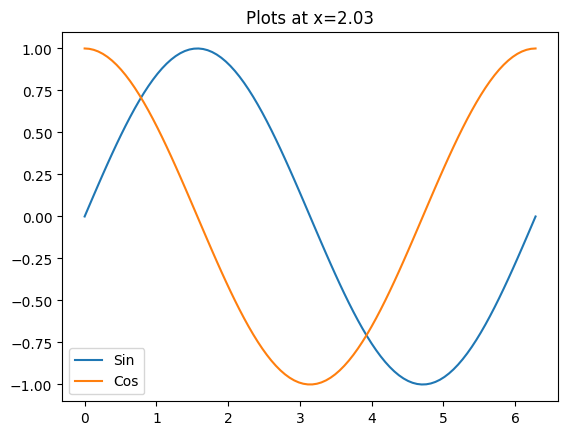

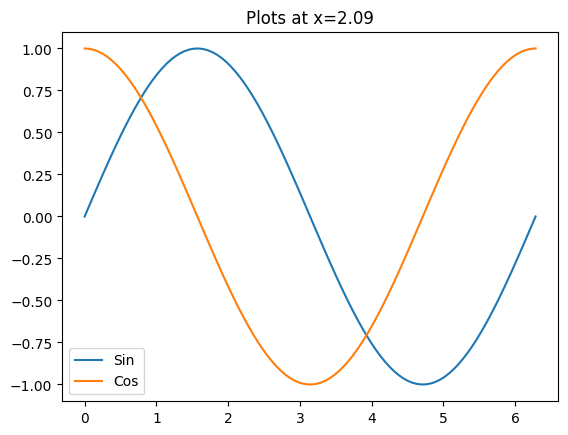

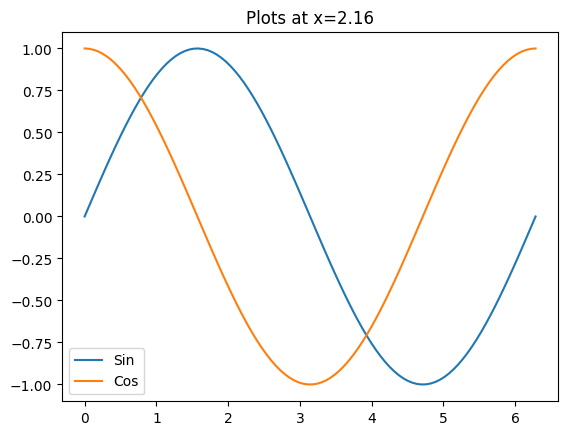

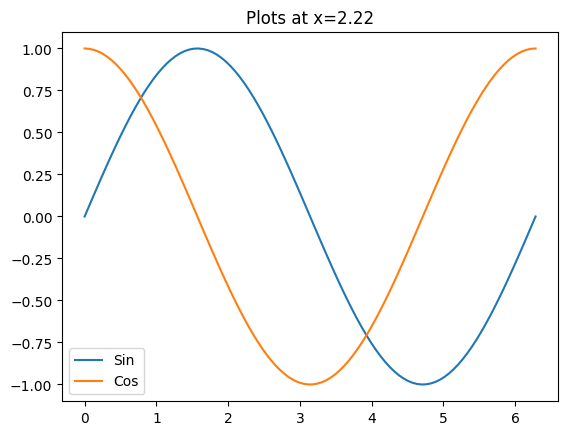

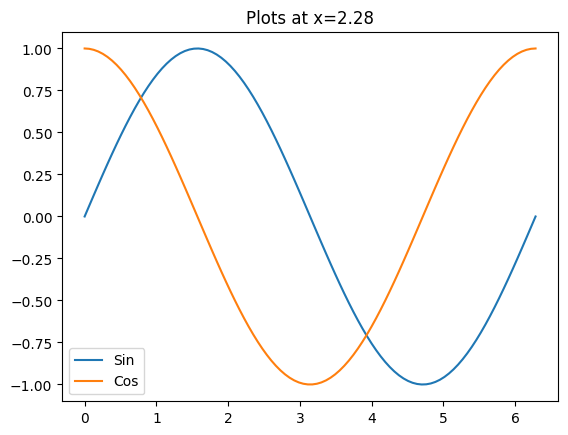

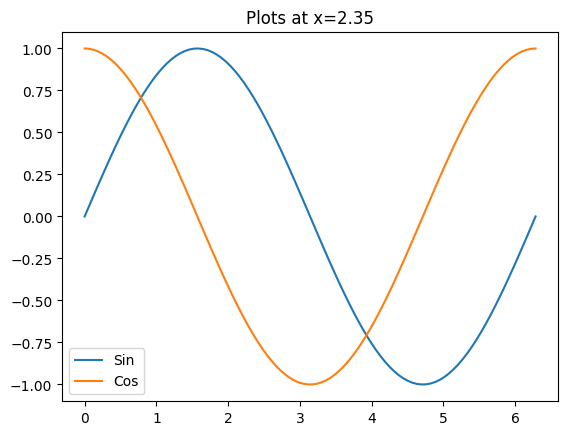

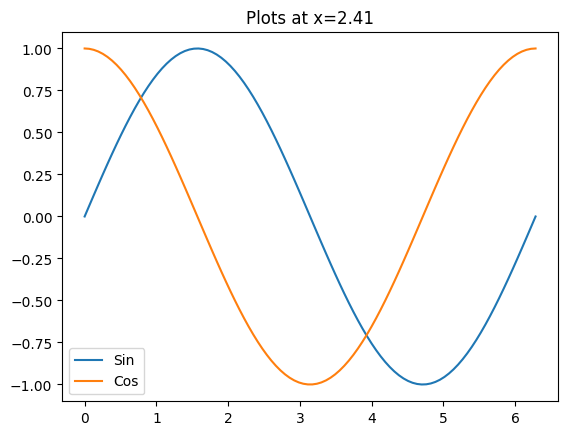

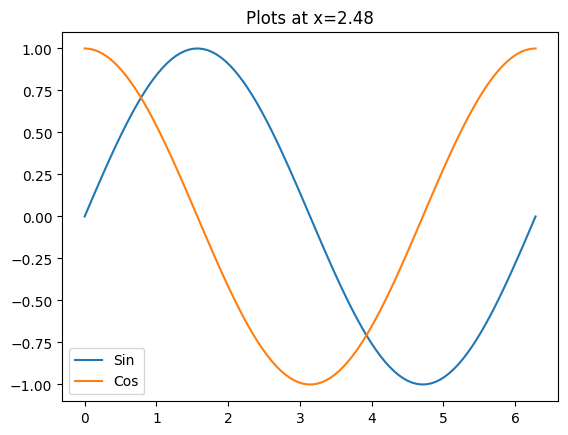

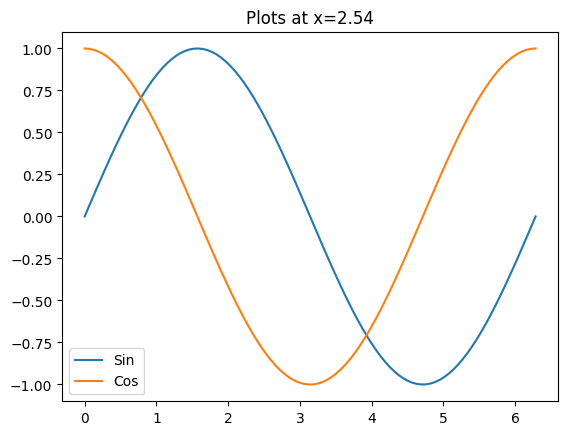

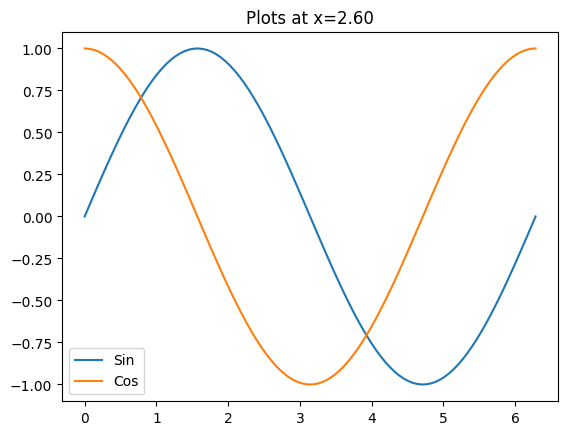

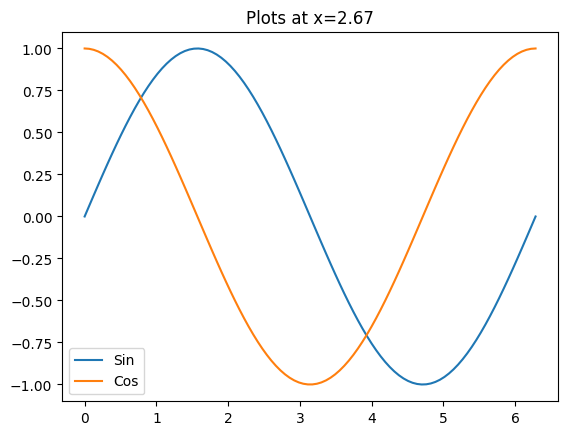

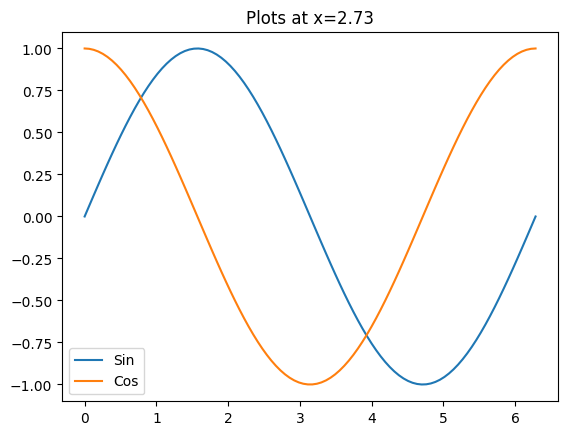

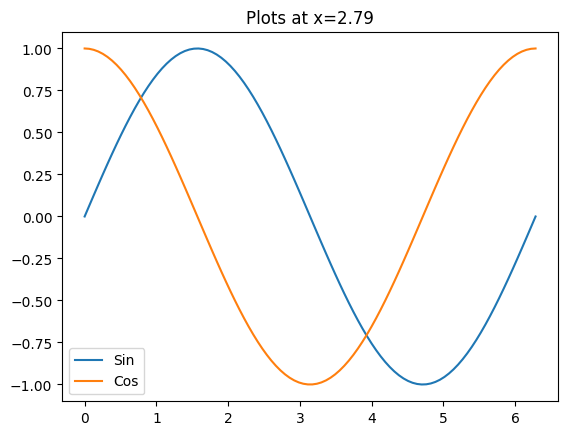

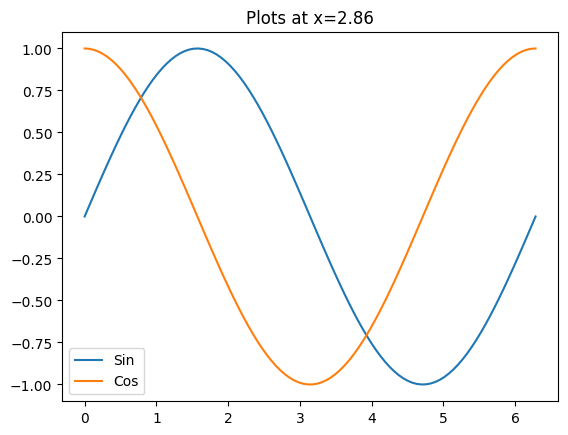

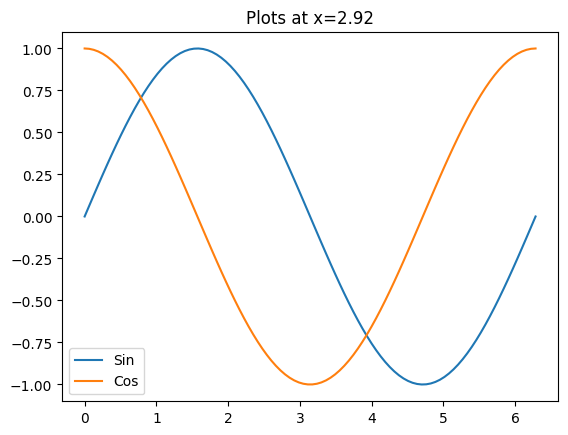

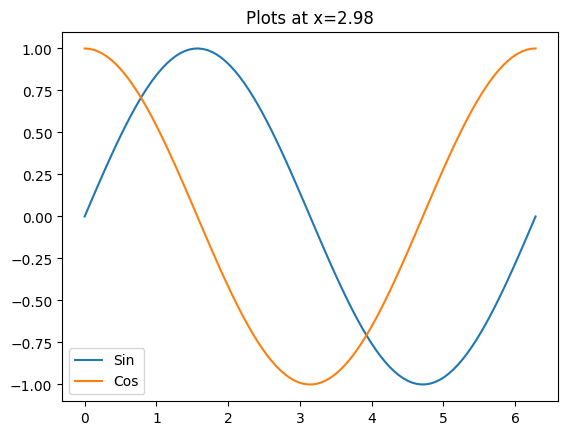

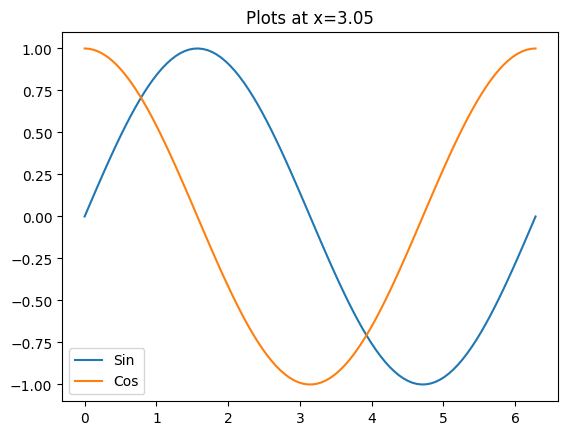

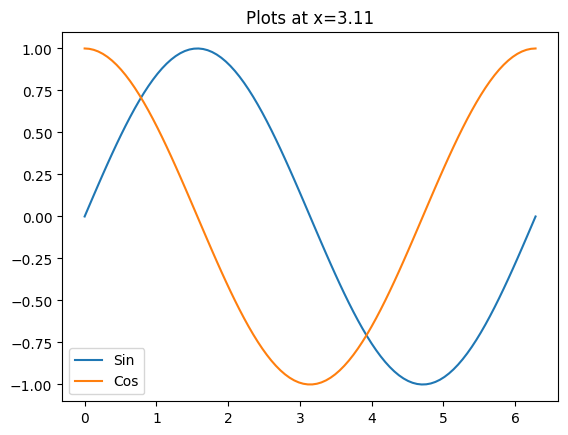

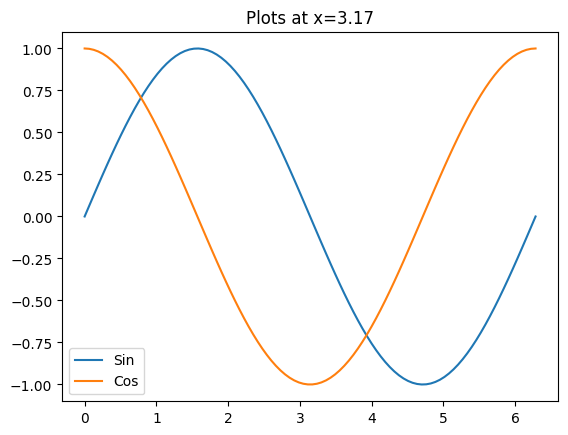

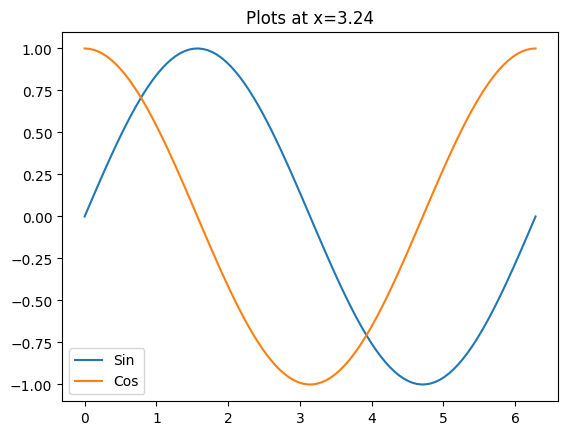

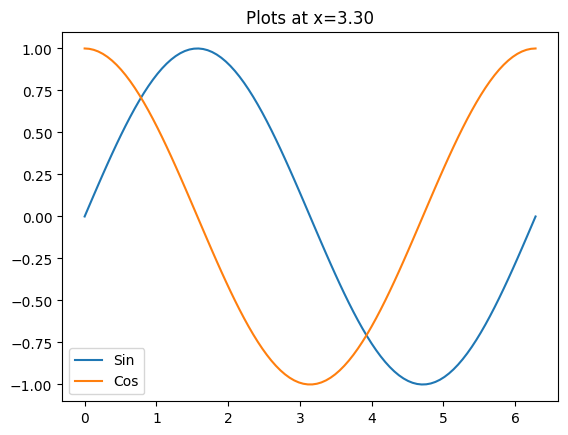

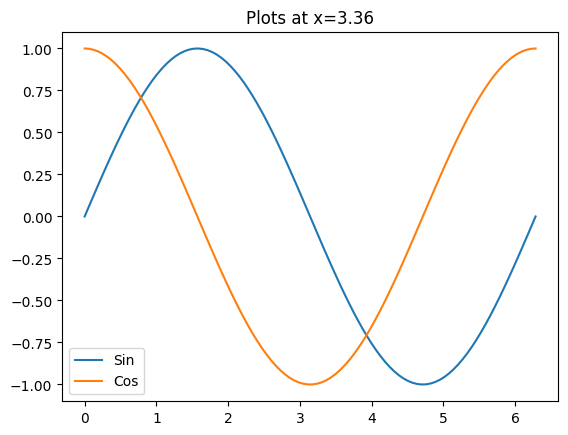

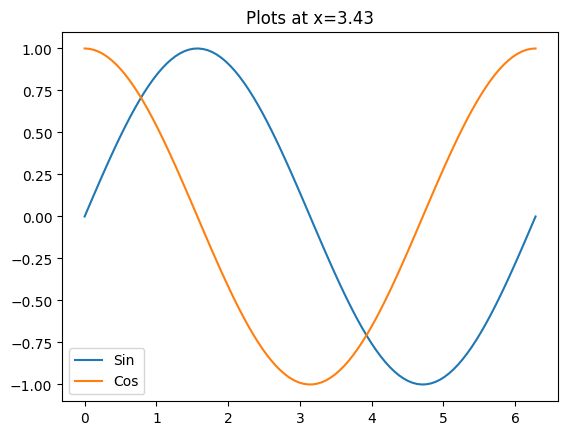

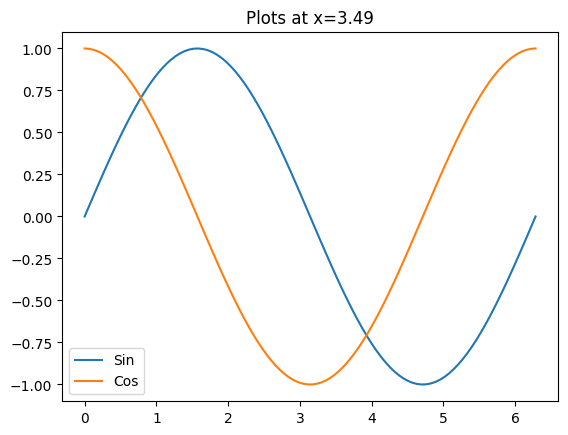

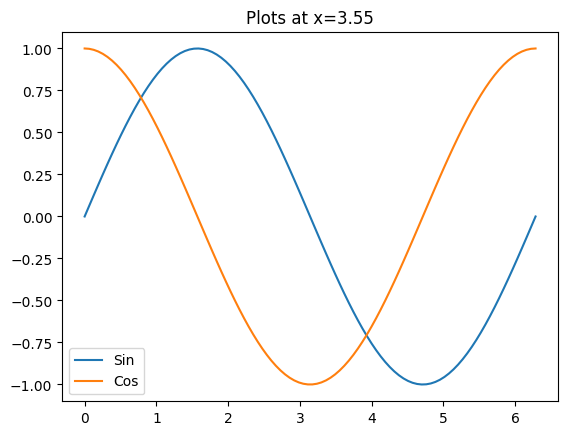

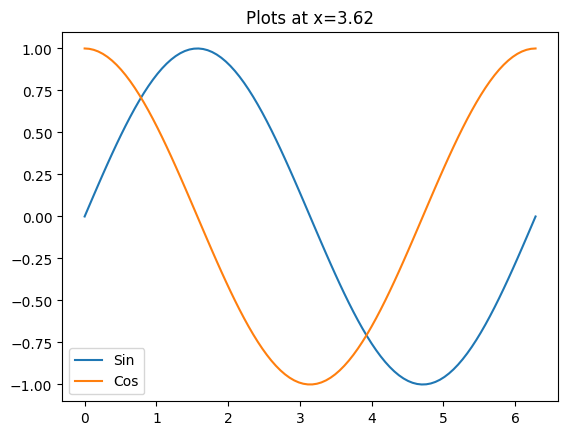

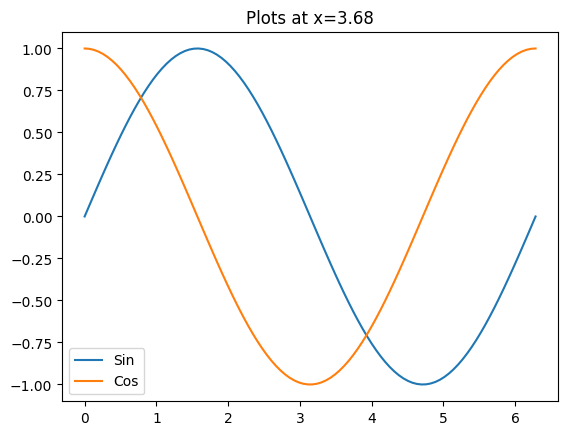

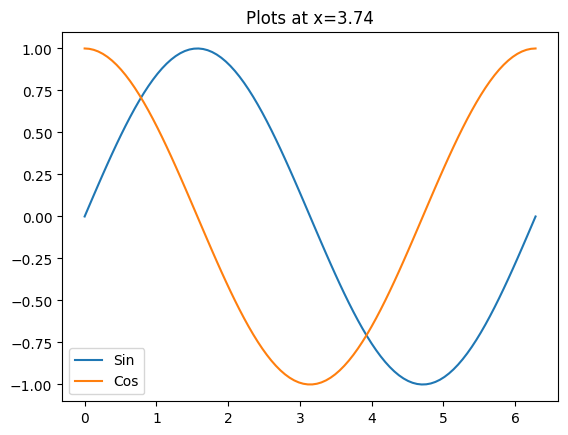

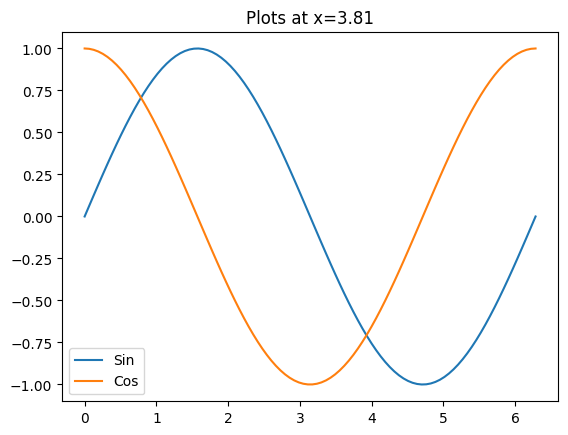

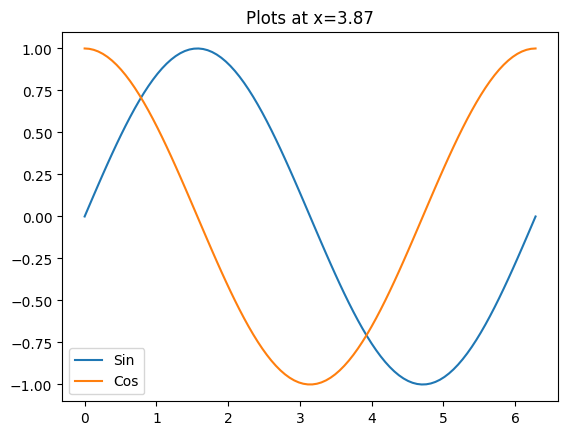

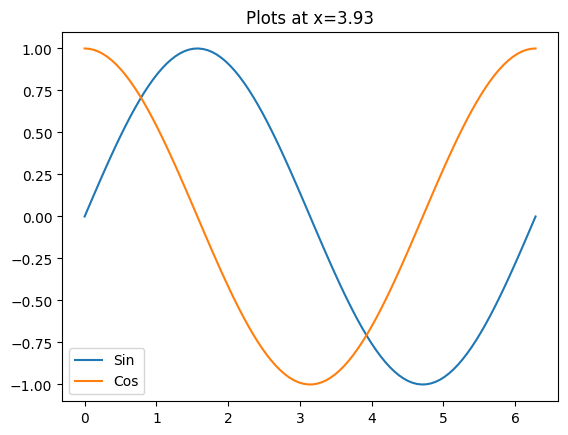

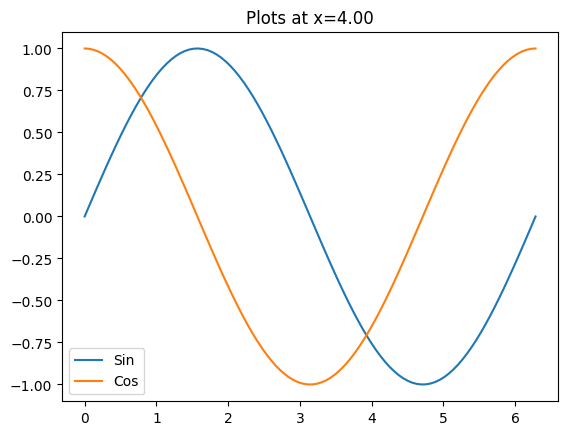

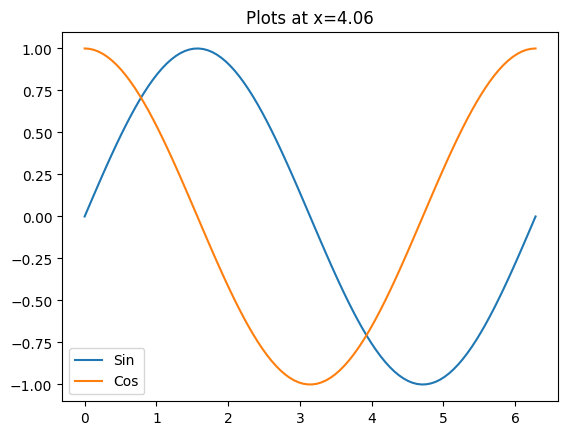

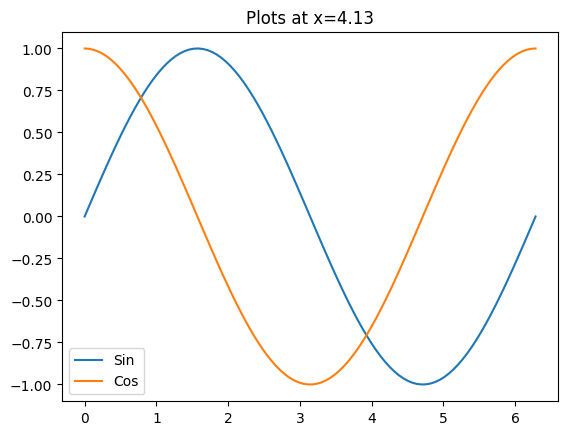

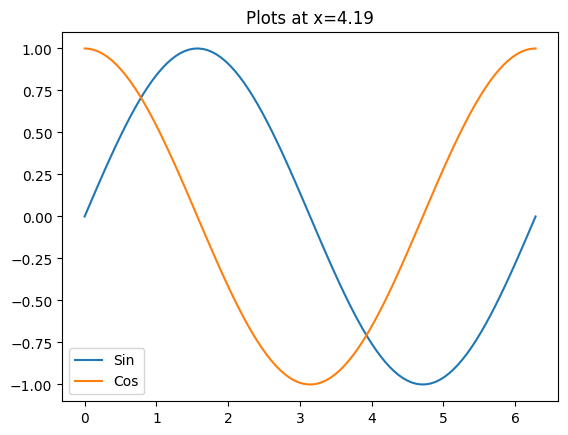

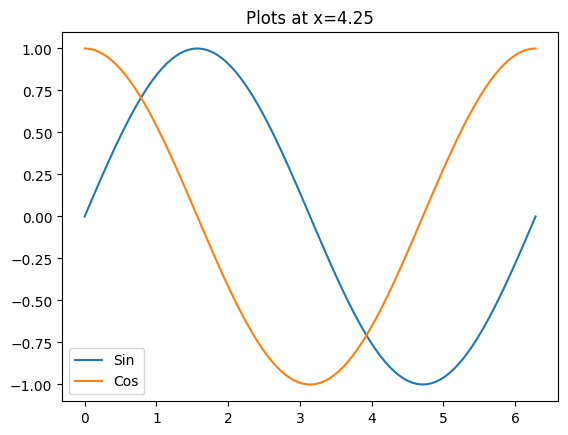

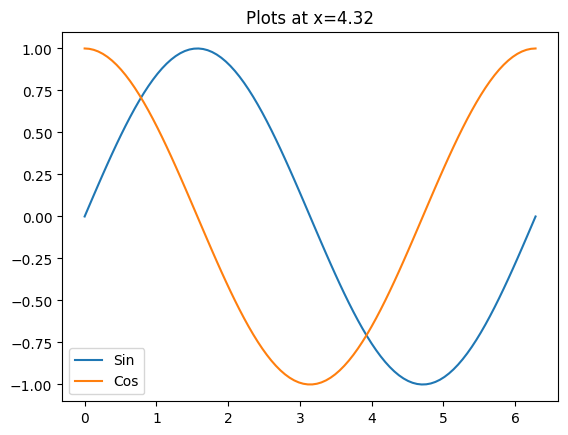

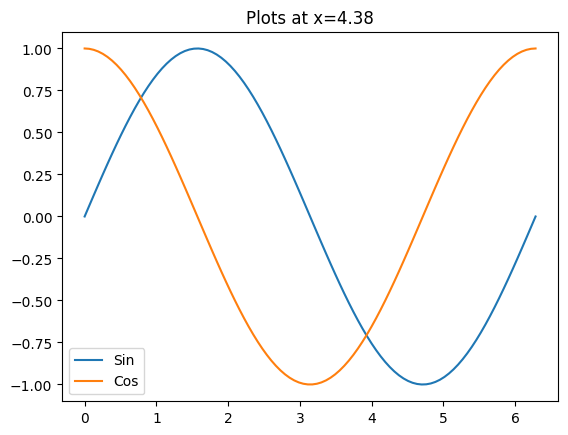

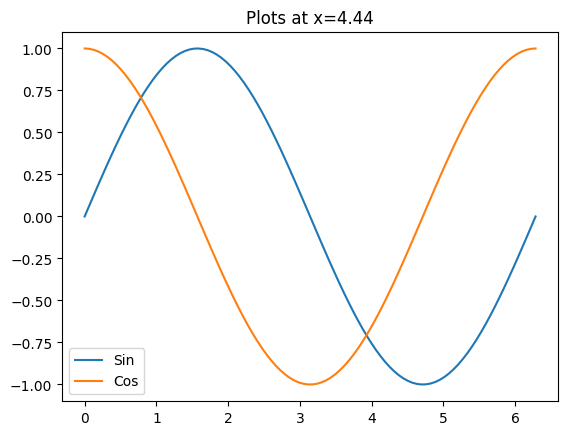

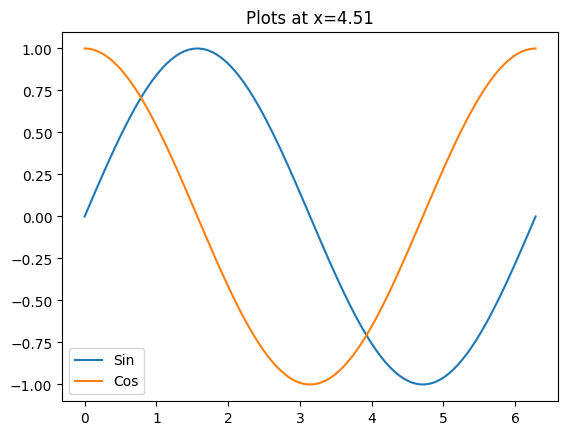

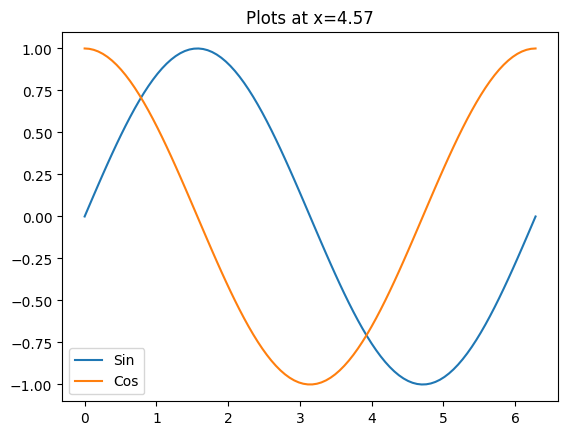

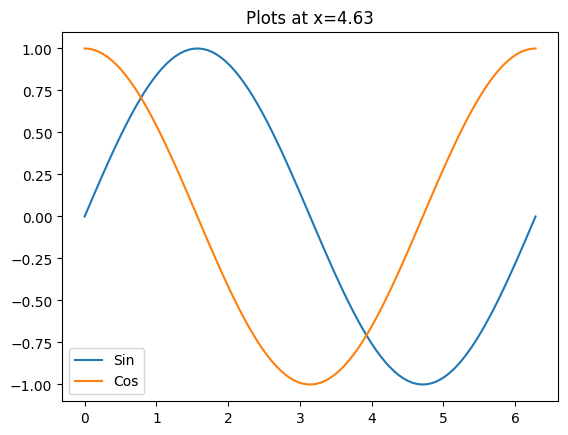

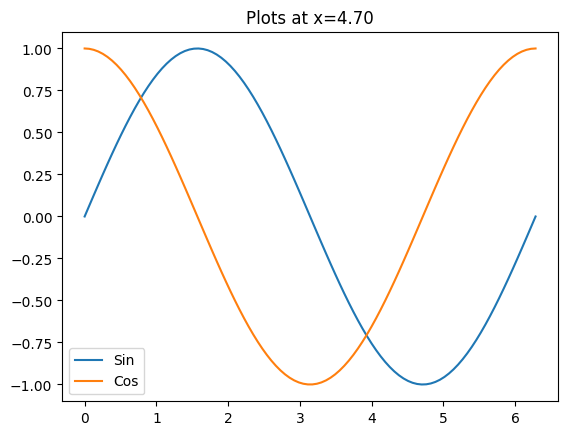

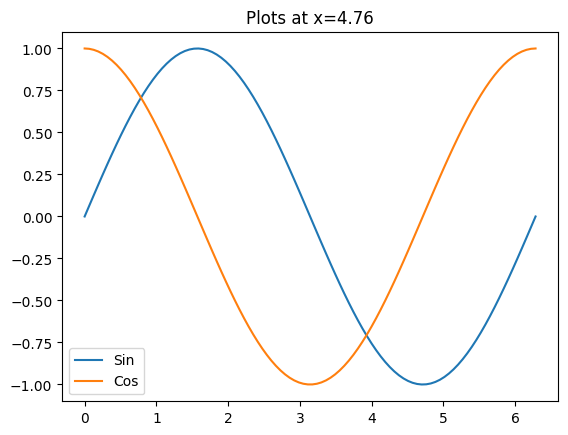

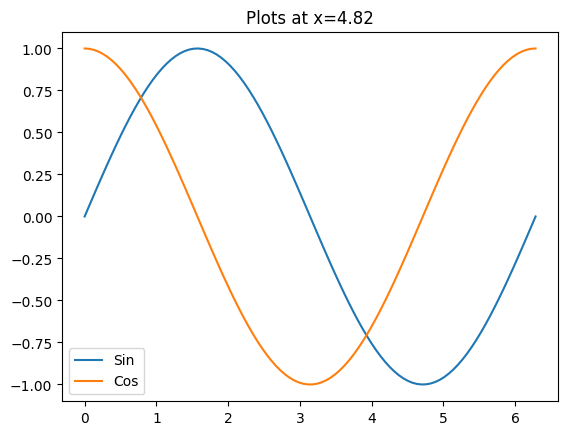

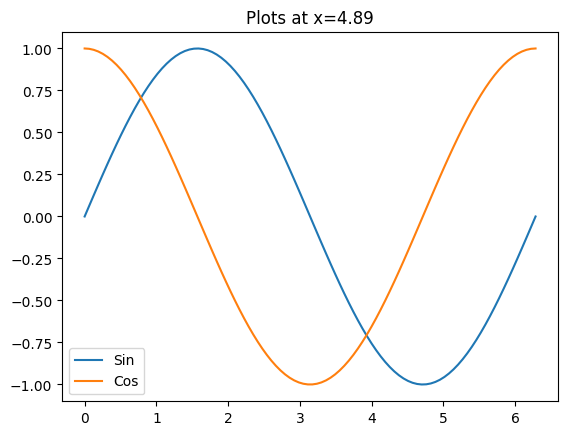

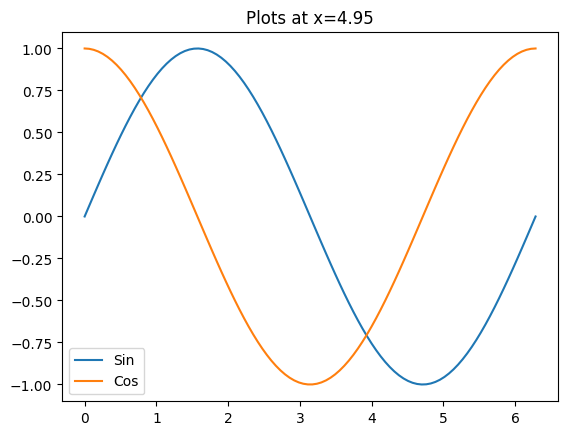

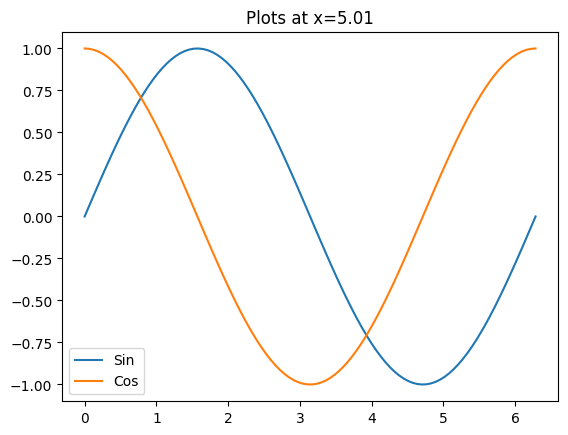

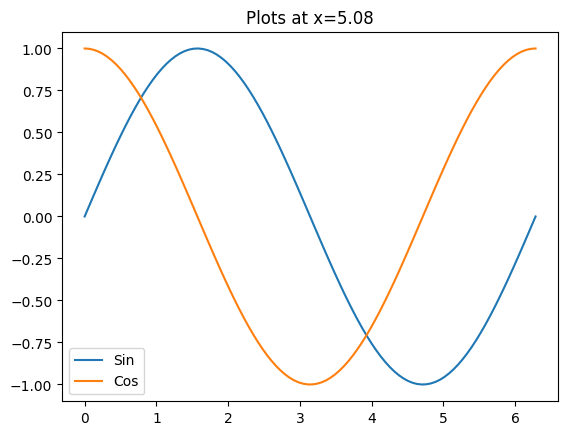

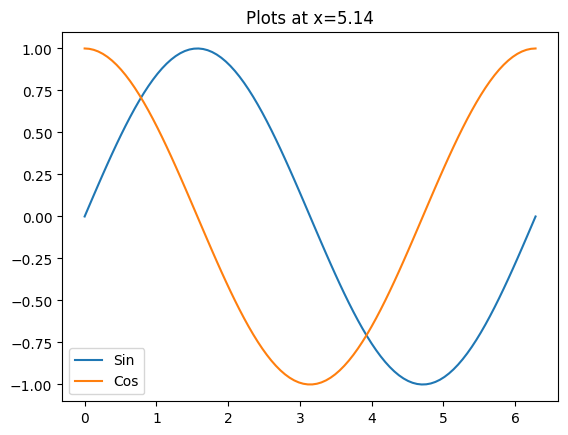

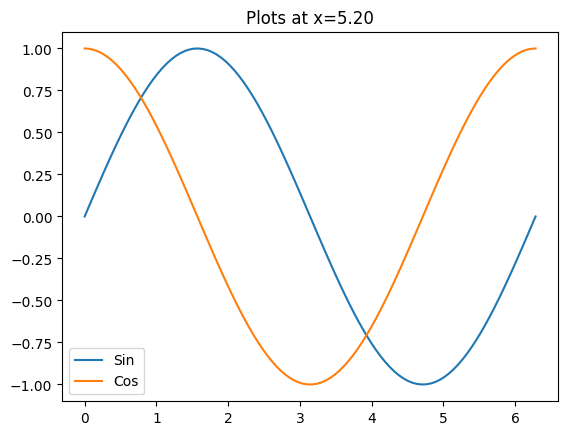

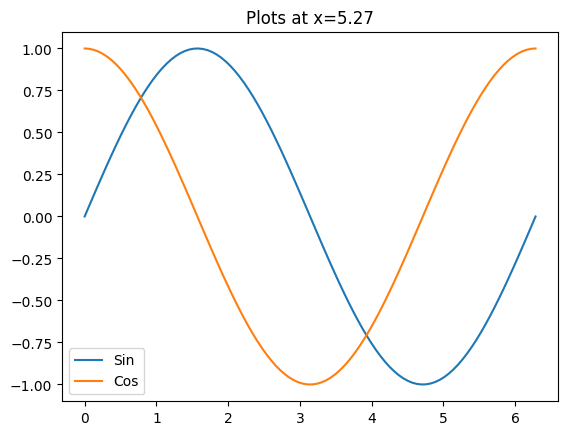

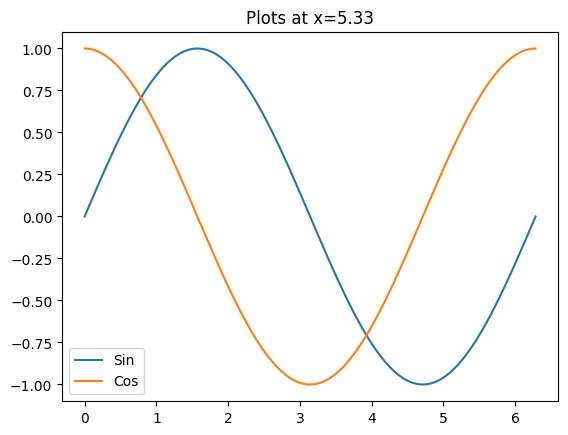

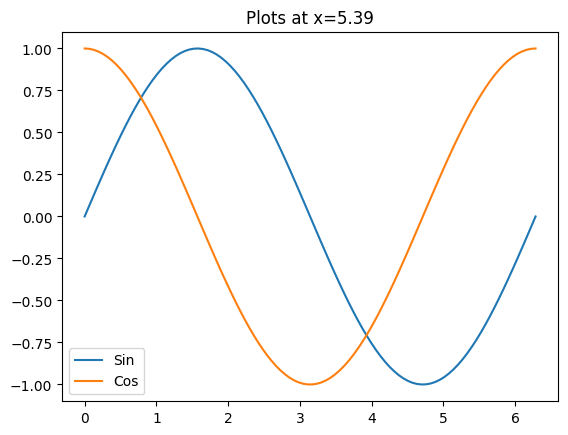

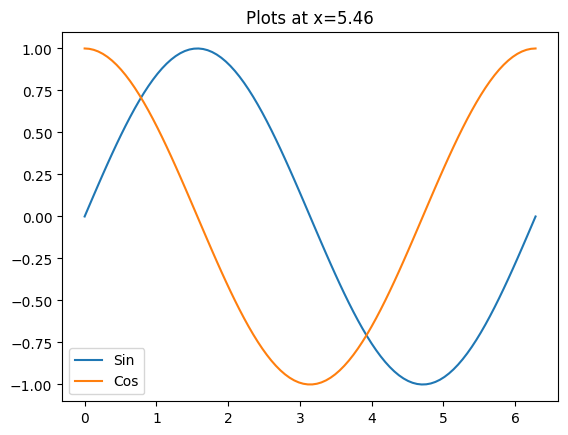

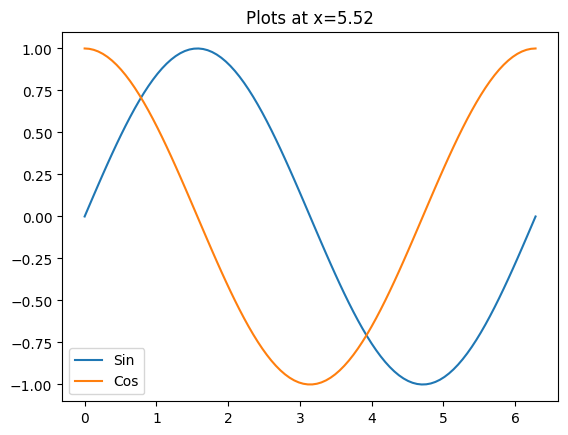

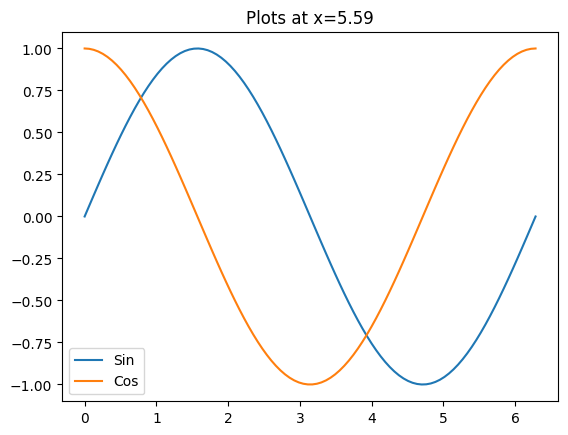

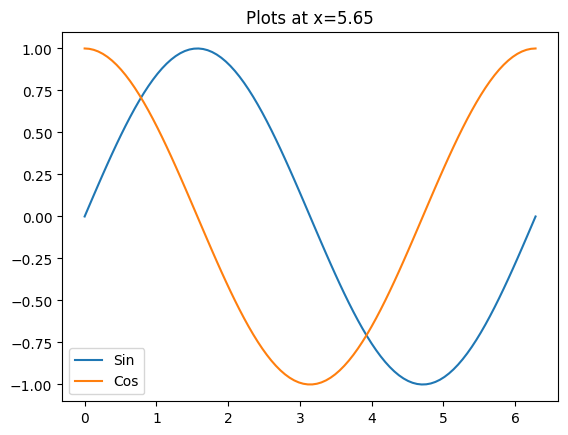

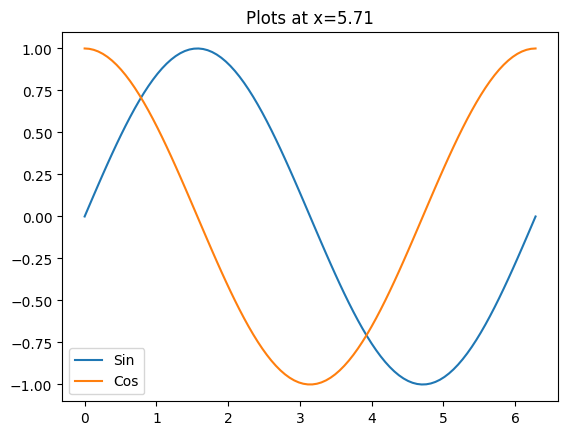

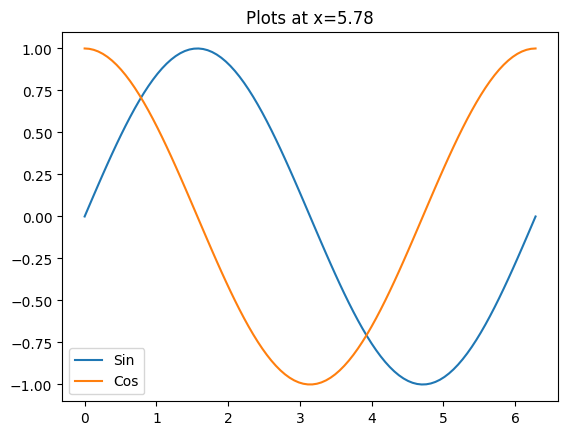

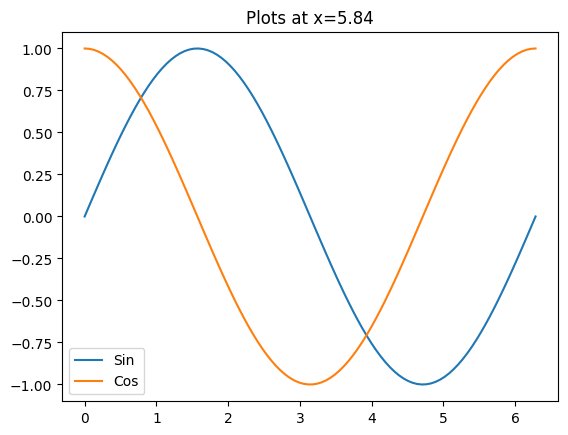

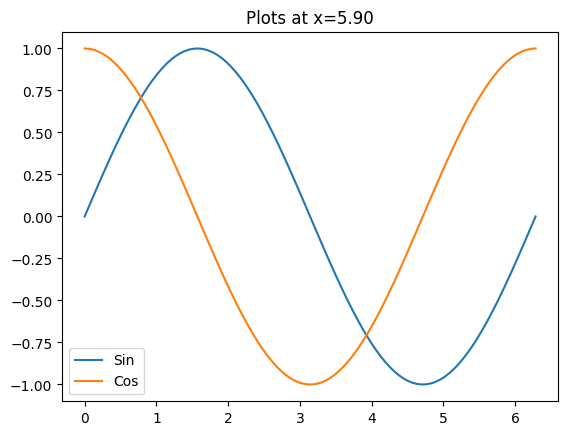

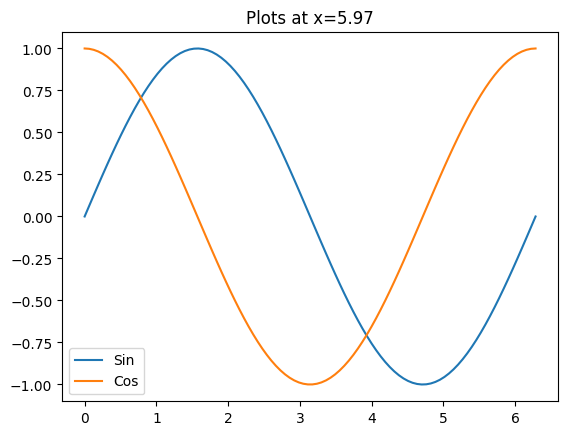

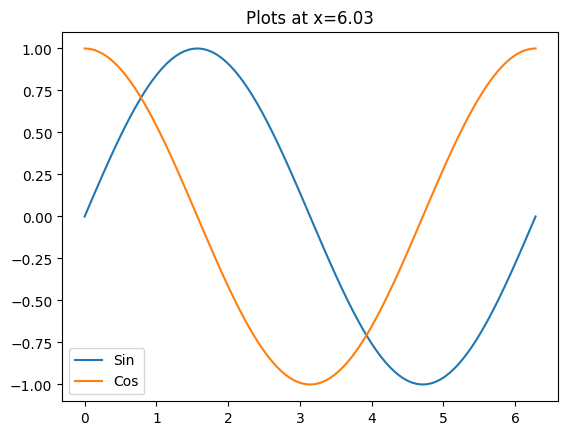

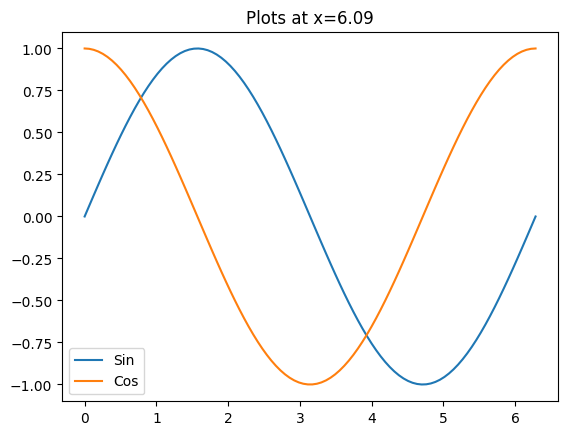

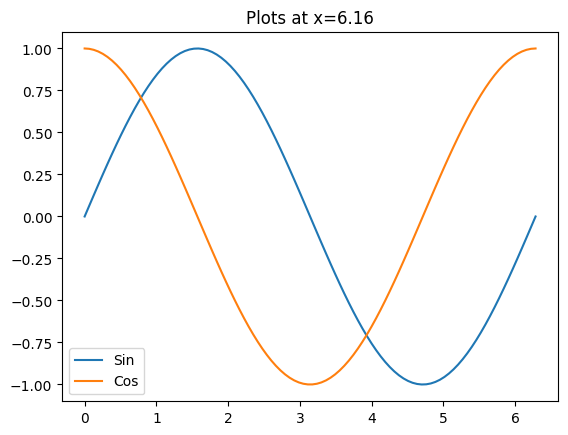

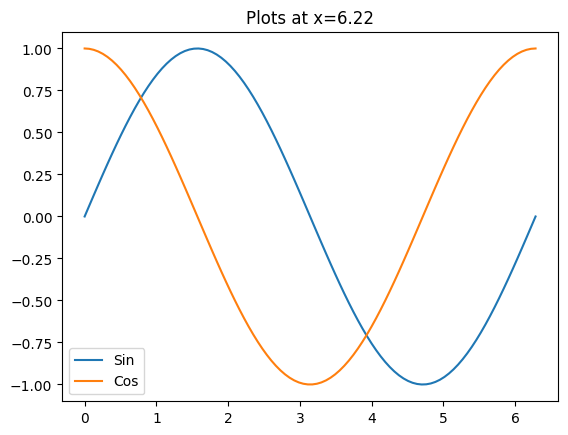

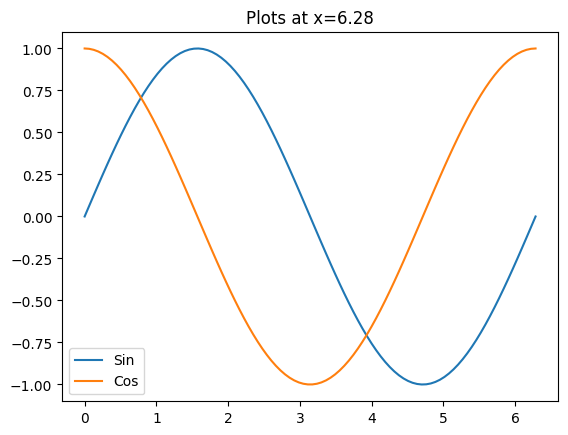

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import io
import imageio
from IPython.display import HTML

# Generate some data to plot
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create an in-memory buffer to hold the plot images
buf = io.BytesIO()

# Plot the data and save the images to the in-memory buffer
images = []
for i in range(len(x)):
    fig, ax = plt.subplots()
    ax.plot(x, y1, label='Sin')
    ax.plot(x, y2, label='Cos')
    ax.set_title('Plots at x={:.2f}'.format(x[i]))
    ax.legend()
    fig.canvas.print_figure(buf)
    buf.seek(0)
    images.append(imageio.imread(buf))

# Create the GIF animation
gif = imageio.mimread(images, duration=0.1)
HTML('<img src="data:image/gif;base64,{0}" />'.format(imageio.mimwrite(gif, format='gif', fps=10, quality=10).decode('ascii')))